<a href="https://colab.research.google.com/github/bahl-lab-konstanz/animal_physiology_class/blob/main/drosophila_larva_movie_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# The Python programming language is based on modules, which can be importated in the beginning
# We will use the following modules for our analysis:
import imageio                      # This allows loading and saving of videos and images.
import numpy as np                  # This module is important for 
from pathlib import Path
from scipy.stats import mode
from google.colab import files
from IPython.display import HTML
from base64 import b64encode
from bokeh.plotting import figure, show
from bokeh.io import output_notebook 

output_notebook()

jhsdafjkhsd **sd** flksjdf sdf
COOL Stuff

In [16]:
p = figure()

p.xaxis.axis_label = 'Time (s)'
p.yaxis.axis_label = "Value"
x = np.arange(0, 100, 0.01)
y = np.sin(x)**2
p.circle(x, y)
show(p)

In [ ]:
uploaded = files.upload()

Saving Basler acA2040-90um (22778061)_20201215_135505759_size_reduced.mp4 to Basler acA2040-90um (22778061)_20201215_135505759_size_reduced.mp4


In [ ]:
for name in uploaded:
  pass

mp4 = open(name,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""<video width=400 controls><source src="%s" type="video/mp4"></video>""" % data_url)

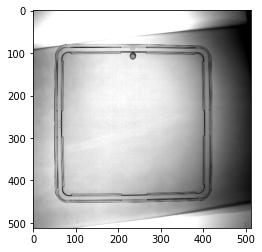

In [ ]:
vid = imageio.get_reader(name,  'ffmpeg')
input_fps = vid.get_meta_data()['fps']

all_frames = []
for i, frame in enumerate(vid):
    if i%10 == 0:
        all_frames.append(frame[:, :, 0])

background, count = mode(all_frames, axis=0)
background = background[0]
imageio.imwrite("background.tiff", background)

pl.imshow(background, cmap='gray')
pl.show()

In [ ]:
writer = imageio.get_writer("background_subtracted.mp4", fps=input_fps, ffmpeg_params=["-b:v", "4M"])

for i, frame in enumerate(vid):

    background_subtracted = background.astype(np.int) - frame[:, :, 0].astype(np.int)

    idx = background_subtracted > 50
    background_subtracted[idx] = 255
    background_subtracted[~idx] = 0

    writer.append_data(background_subtracted.astype(np.uint8))

writer.close()

In [ ]:
mp4 = open('background_subtracted.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""<video width=400 controls><source src="%s" type="video/mp4"></video>""" % data_url)

(1201, 3)


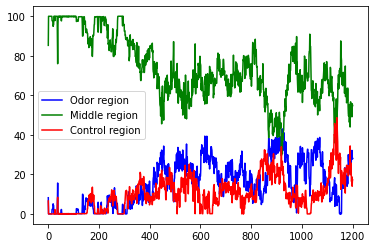

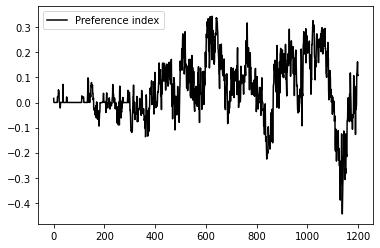

In [ ]:
vid = imageio.get_reader('background_subtracted.mp4',  'ffmpeg')

sums = []
for i, frame in enumerate(vid):
    sum_region1 = frame[0:170,:,0].sum()
    sum_region2 = frame[170:340,:,0].sum()
    sum_region3 = frame[340:510,:,0].sum()

    sums.append([sum_region1, sum_region2, sum_region3])

sums = np.array(sums).astype(np.int)
print(sums.shape)

all_pixels = sums.sum(axis=1)
pl.plot(100 * sums[:,0] / all_pixels, color='blue', label="Odor region") # duft
pl.plot(100 * sums[:,1] / all_pixels, color='green', label="Middle region") # mitte
pl.plot(100 * sums[:,2] / all_pixels, color='red', label="Control region") # unten
pl.legend()
pl.figure()

pl.plot((sums[:,0] - sums[:,2]) / all_pixels, color='black', label="Preference index") # unten
pl.legend()
pl.show()
